In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import iqr
import missingno as msno
import squarify as sq
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("../data/b_depressed.csv")
dataset

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


&nbsp;

In [3]:
rows, columns = dataset.shape
print(f'Редици: {rows}\nКолони: {columns}')

Редици: 1429
Колони: 23


&nbsp;

## Претпроцесирање

&nbsp;

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [5]:
dataset.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


In [6]:
dataset.isna().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

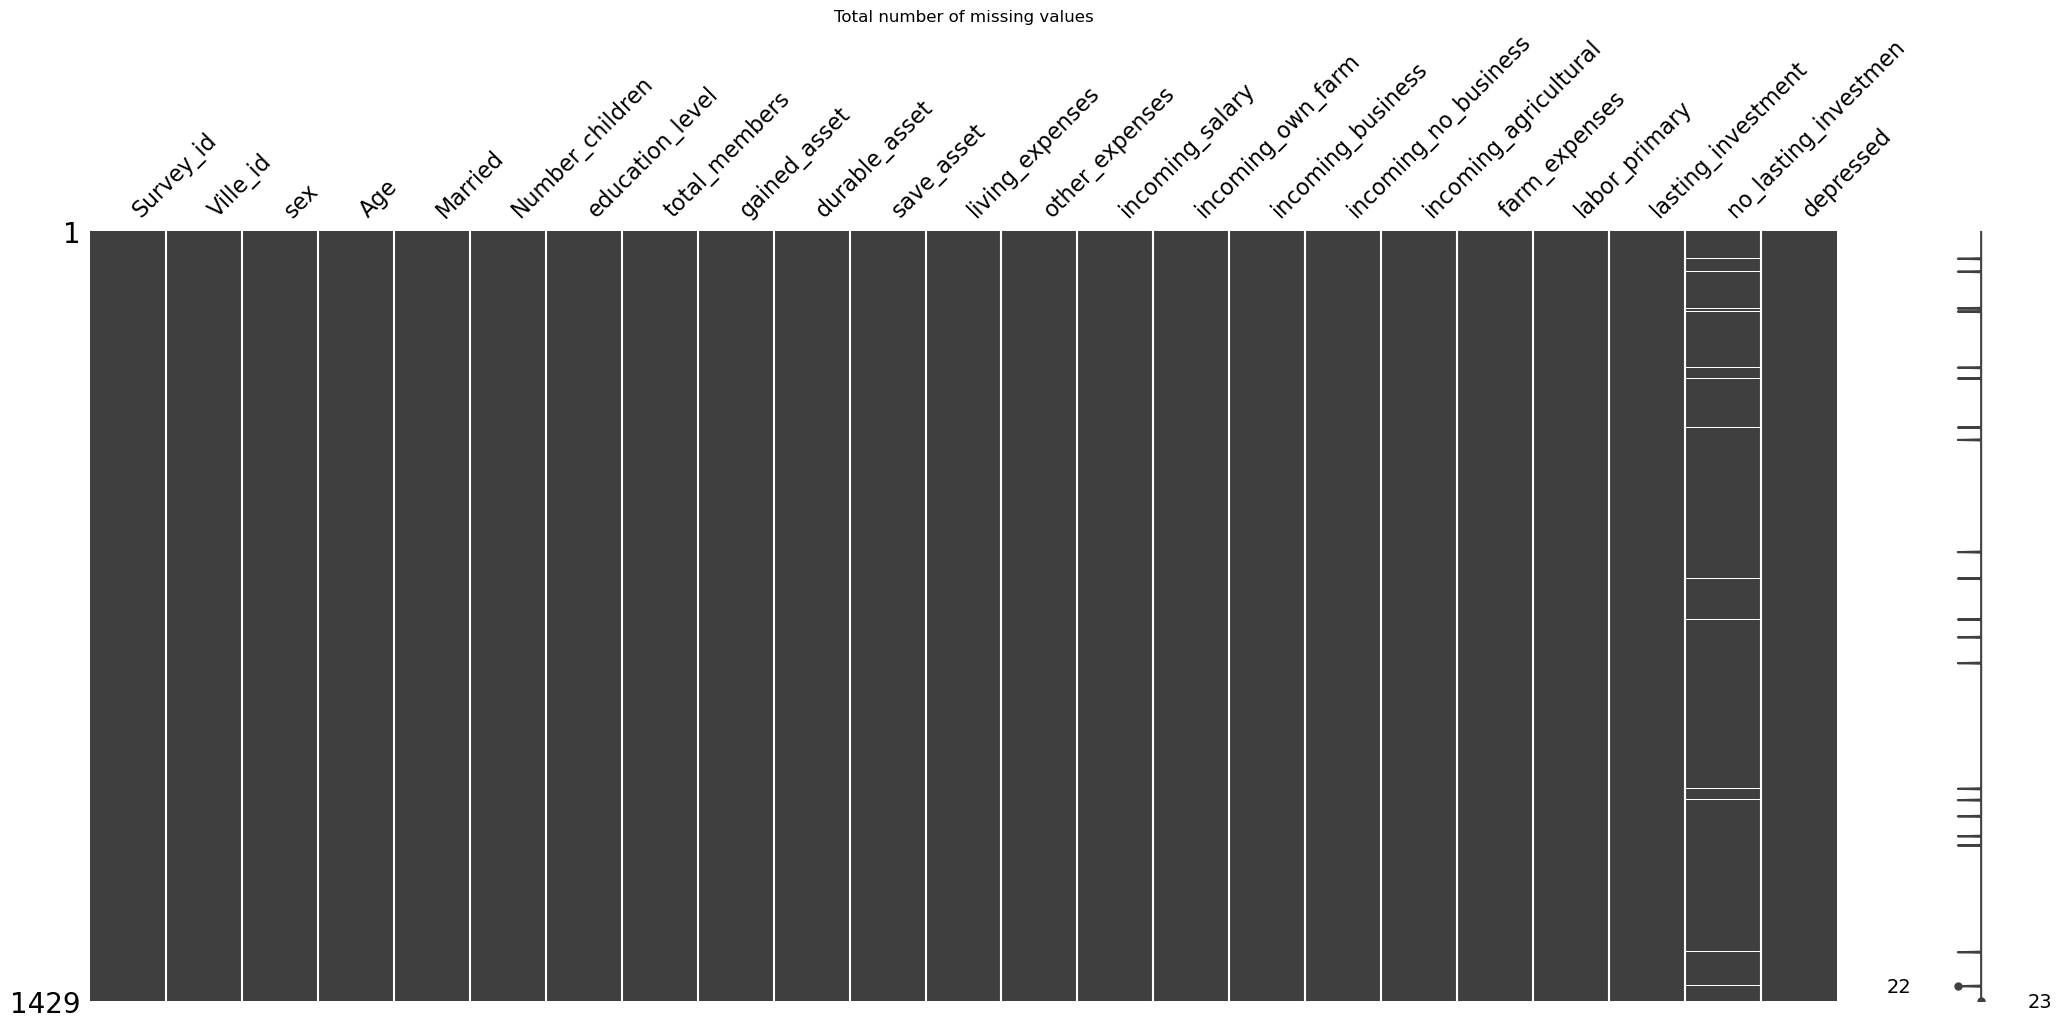

In [7]:
msno.matrix(dataset)
plt.title("Total number of missing values")
plt.show()

In [8]:
mean_value = dataset['no_lasting_investmen'].round(decimals = 2).mean()
median_value = dataset['no_lasting_investmen'].round(decimals = 2).median()

In [9]:
print(f'Средна вредност на атрибутот no_lasting_investmen е {mean_value}.')
print(f'Медијана на атрибутот no_lasting_investmen е {median_value}.')

Средна вредност на атрибутот no_lasting_investmen е 33603850.543647975.
Медијана на атрибутот no_lasting_investmen е 28292707.0.


In [10]:
dataset['no_lasting_investmen'].fillna((dataset['no_lasting_investmen'].median()), inplace=True)

In [11]:
dataset.isna().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

In [12]:
dataset.nunique()

Survey_id                1429
Ville_id                  255
sex                         2
Age                        71
Married                     2
Number_children            12
education_level            18
total_members              12
gained_asset              441
durable_asset             590
save_asset                268
living_expenses           411
other_expenses            615
incoming_salary             2
incoming_own_farm           2
incoming_business           2
incoming_no_business        2
incoming_agricultural     330
farm_expenses             694
labor_primary               2
lasting_investment        982
no_lasting_investmen      939
depressed                   2
dtype: int64

In [13]:
total_cells = np.product(dataset.shape)
unique_values_count = dataset.nunique().sum()
total_unique = unique_values_count.sum()
(total_unique/total_cells)*100

21.550491374326832

In [14]:
print(dataset.duplicated().any())

False


In [15]:
dataset.to_csv('../data/depression.csv', index=False)

&nbsp;

## Exploratory Data Analysis

&nbsp;

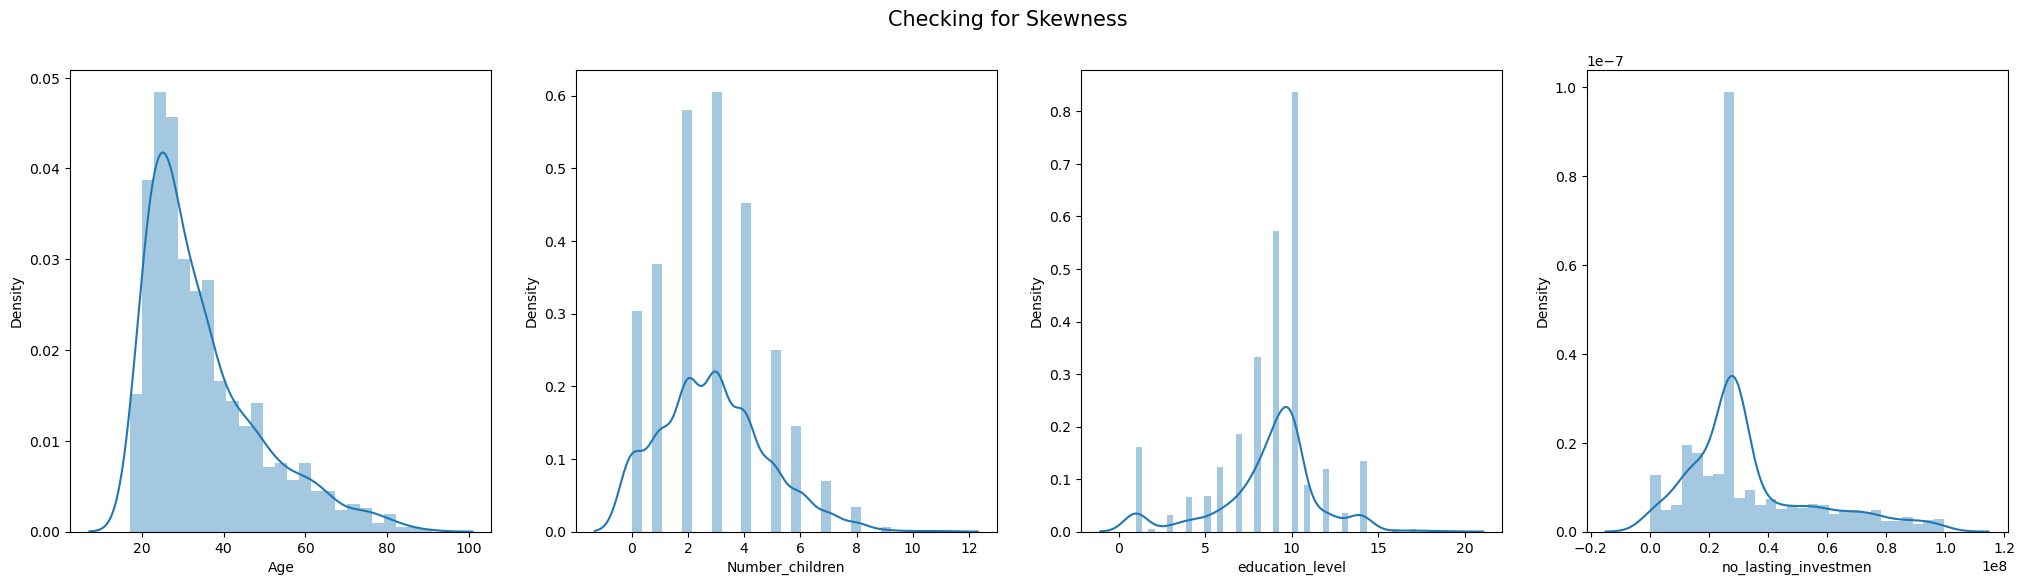

In [16]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
sns.distplot(dataset['Age'])

plt.subplot(1, 4, 2)
sns.distplot(dataset['Number_children'])

plt.subplot(1, 4, 3)
sns.distplot(dataset['education_level'])

plt.subplot(1, 4, 4)
sns.distplot(dataset['no_lasting_investmen'])

plt.suptitle('Checking for Skewness', fontsize = 15)
plt.show()

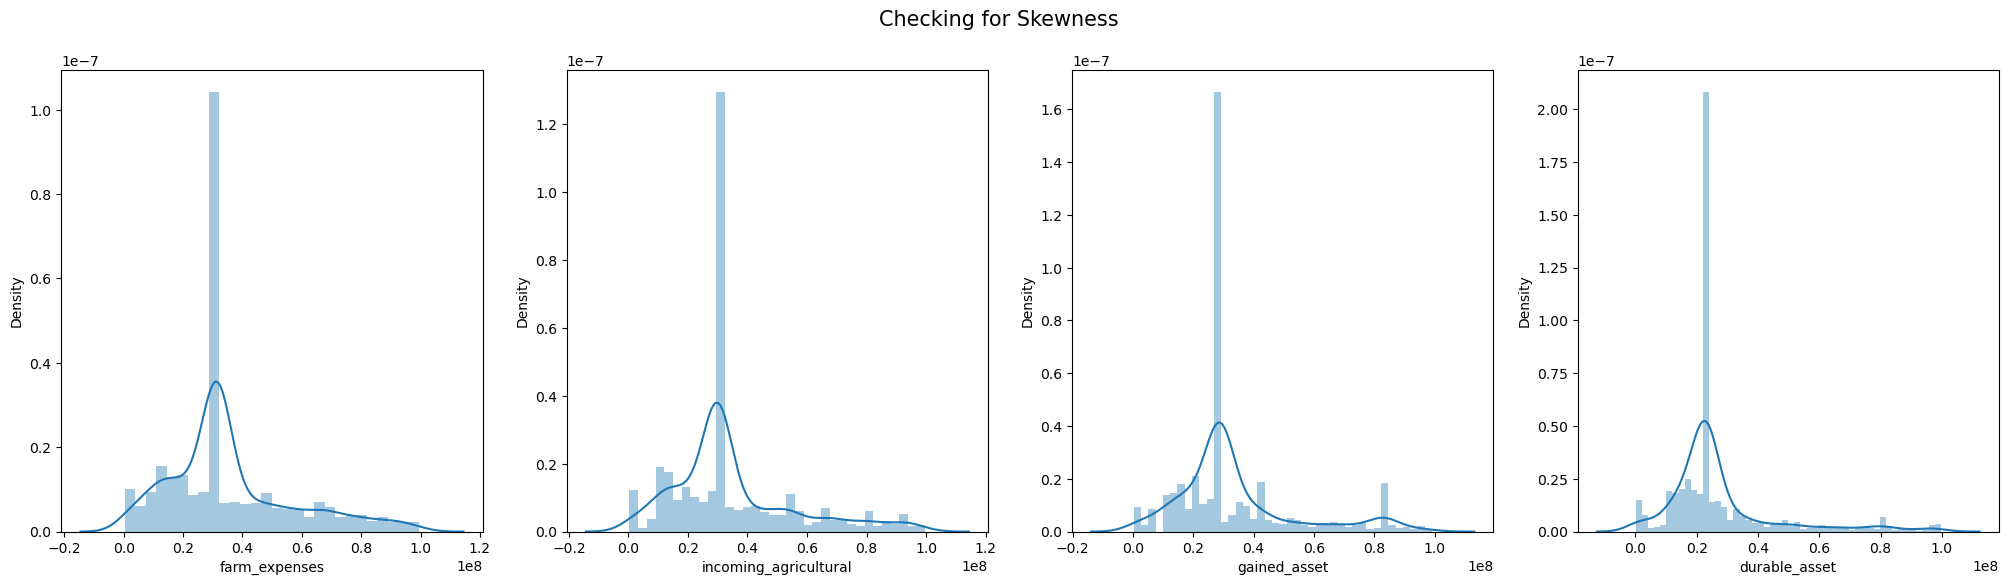

In [17]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
sns.distplot(dataset['farm_expenses'])

plt.subplot(1, 4, 2)
sns.distplot(dataset['incoming_agricultural'])

plt.subplot(1, 4, 3)
sns.distplot(dataset['gained_asset'])

plt.subplot(1, 4, 4)
sns.distplot(dataset['durable_asset'])

plt.suptitle('Checking for Skewness', fontsize = 15)
plt.show()

нивото на образование е речиси нормално распределено, како и за возраста, децата и без трајна инвестиција, сите се позитивно распределени што значи дека повеќето од податоците се помали од средниот, истото важи и за трошоците на фармата, дојдовното земјоделство, стекнатите и трајните средства.

### Врска помеѓу карактеристиките и класата

#### Personal Info VS depressed

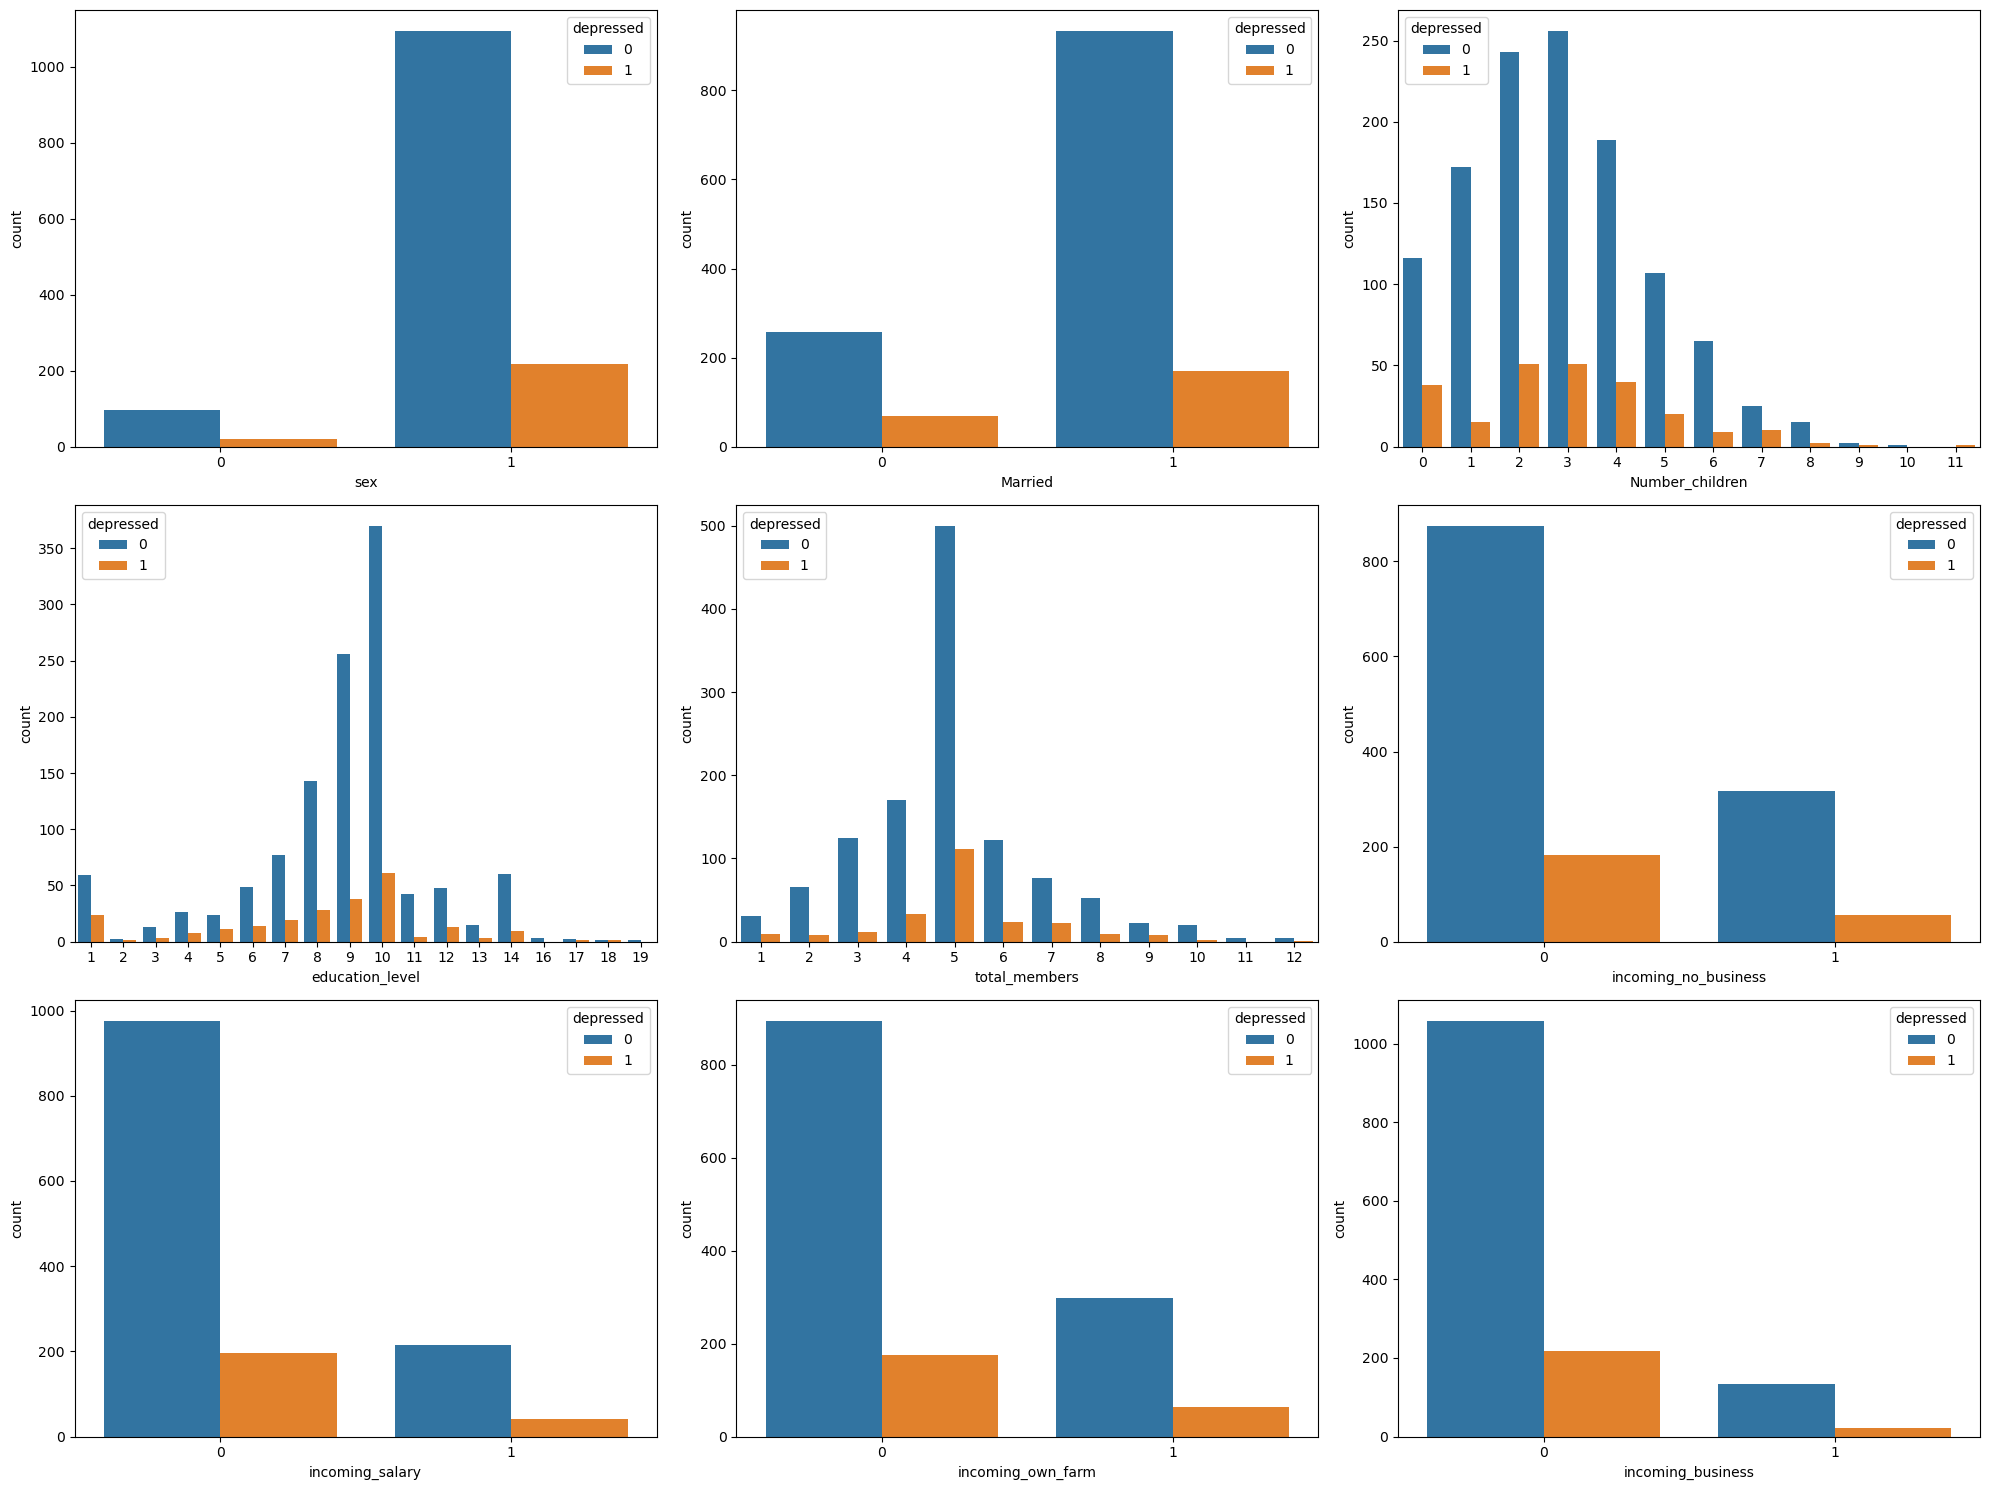

In [18]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x='sex', hue='depressed', data=dataset)
plt.subplot(3,3,2)
sns.countplot(x='Married', hue='depressed', data=dataset)
plt.subplot(3,3,3)
sns.countplot(x='Number_children', hue='depressed', data=dataset)

plt.subplot(3,3,4)
sns.countplot(x='education_level', hue='depressed', data=dataset)
plt.subplot(3,3,5)
sns.countplot(x='total_members', hue='depressed', data=dataset)
plt.subplot(3,3,6)
sns.countplot(x='incoming_no_business', hue='depressed', data=dataset)

plt.subplot(3,3,7)
sns.countplot(x='incoming_salary', hue='depressed', data=dataset)
plt.subplot(3,3,8)
sns.countplot(x='incoming_own_farm', hue='depressed', data=dataset)
plt.subplot(3,3,9)
sns.countplot(x='incoming_business', hue='depressed', data=dataset)

plt.tight_layout()
plt.show()

<Figure size 2500x600 with 0 Axes>

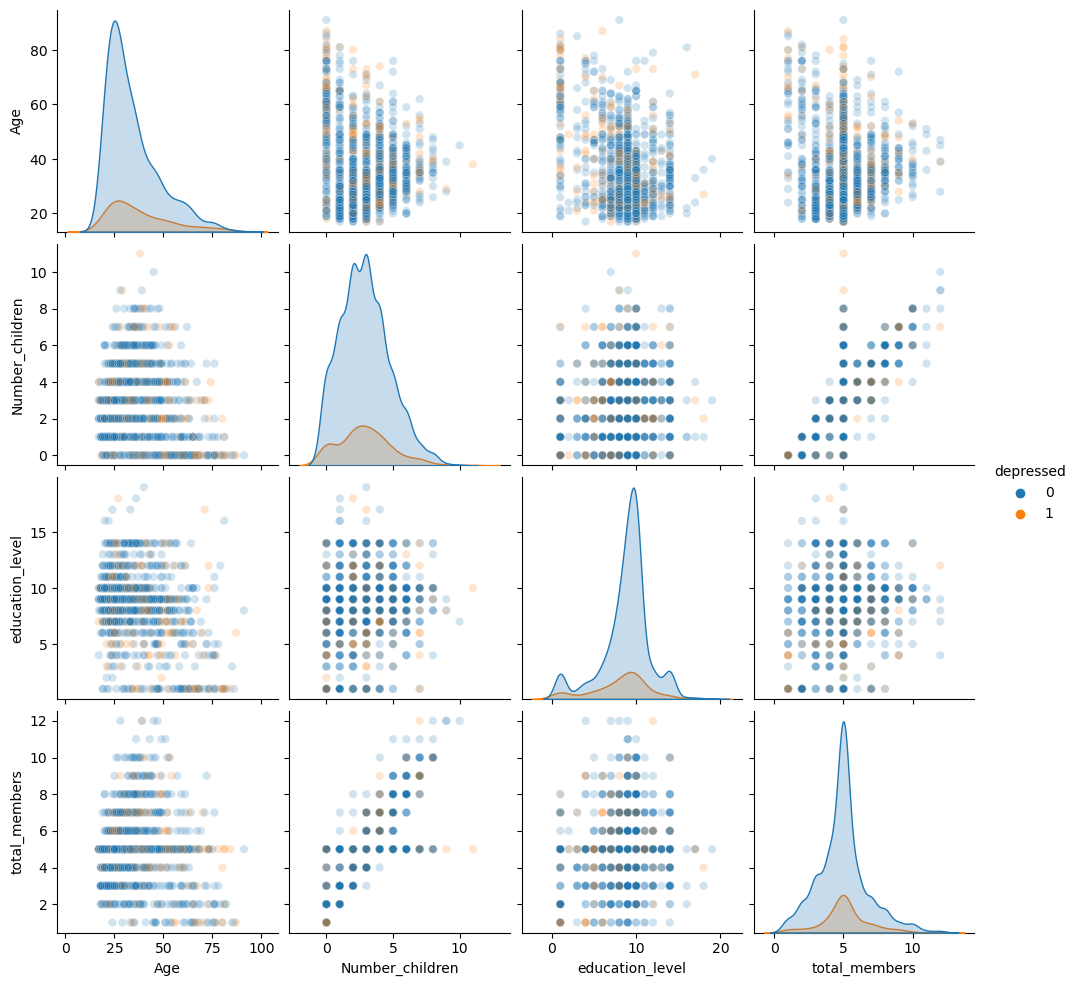

In [19]:
dfPairplot = dataset.drop(['Survey_id' , 'Married' , 'Ville_id' , 'sex'  , 'gained_asset' , 'durable_asset' , 'save_asset' , 
                           'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 
                           'incoming_no_business' , 'incoming_agricultural' , 'farm_expenses' , 'labor_primary' , 'lasting_investment' , 
                           'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

во набљудувањето на овој графикон, колку сте постари и имате повисоко образование, толку е помала веројатноста дека ќе бидете депресивни, a децата и членовите на семејството немаат голем ефект

<Figure size 2500x600 with 0 Axes>

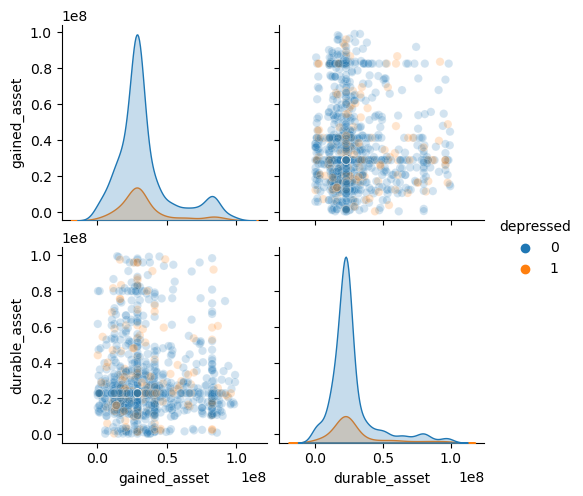

In [20]:
dfPairplot = dataset.drop(['save_asset','Survey_id' , 'Ville_id' , 'sex' , 'Age' , 'Married' , 'Number_children' , 'education_level' , 
                           'total_members' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 
                           'incoming_no_business' , 'incoming_agricultural' , 'farm_expenses' , 'labor_primary' , 'lasting_investment' , 
                           'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

стекнувањето средства не е толку ефективно како трајните средства и сфаќаме дека зголемувањето на трајните средства предизвикуваат депресија

<Figure size 2500x600 with 0 Axes>

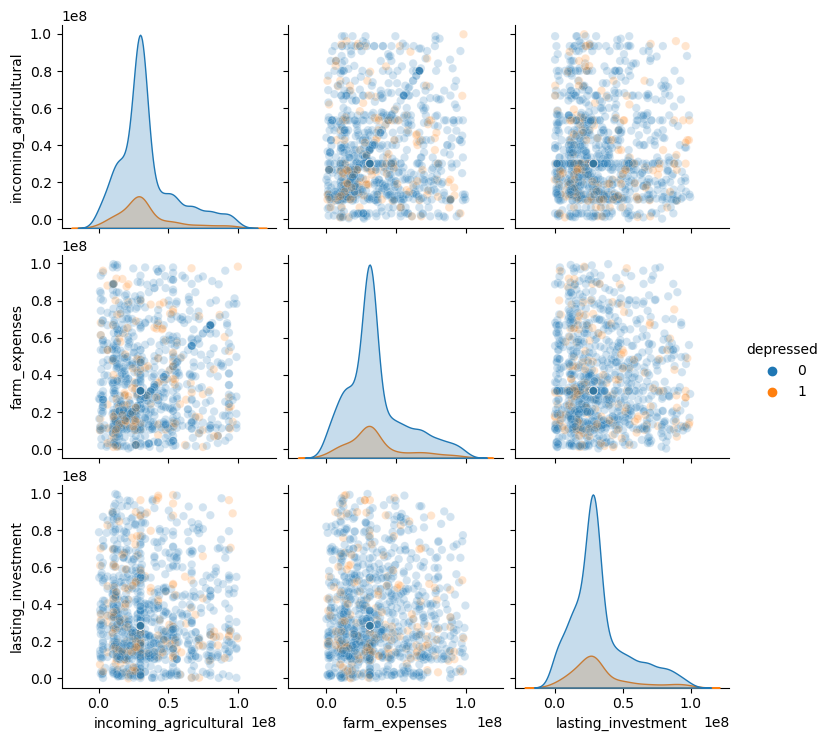

In [21]:
dfPairplot = dataset.drop(['Survey_id' , 'Ville_id' , 'sex' , 'Age' , 'Married' , 'Number_children' , 'education_level' , 'total_members' , 
                           'gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 
                           'incoming_own_farm' , 'incoming_business' , 'incoming_no_business'  , 'labor_primary'     , 'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

поголемиот дел од мнозинството не се депресивни, но сепак може да забележиме дека на некои места депресијата е прилично распределена кај сите, но сепак можеме да најдеме повеќе мажи, повеќе мажени и повеќе без приход

#### Age VS depressed

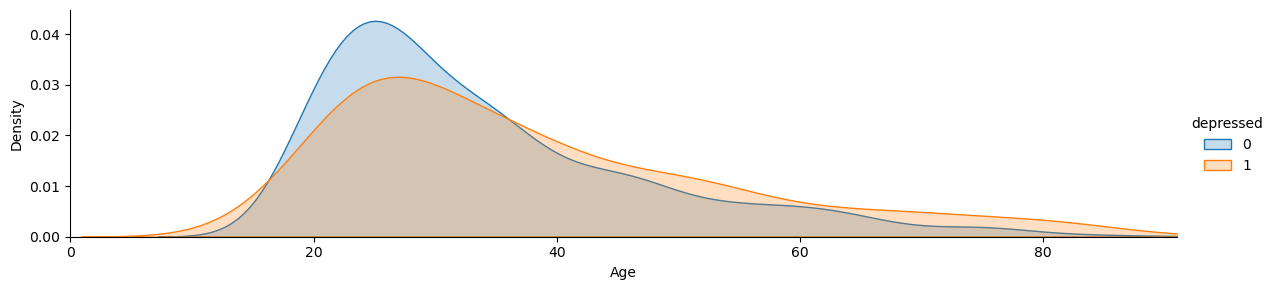

In [22]:
facet = sns.FacetGrid(dataset,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,dataset['Age'].max()))
facet.add_legend()
plt.show()

на возраст од 17 - 18 до 35 - 36 години помала е веројатноста да западне во депресија отколку постари од 36 години и помлади од 17 години

#### Gain Asset VS depressed

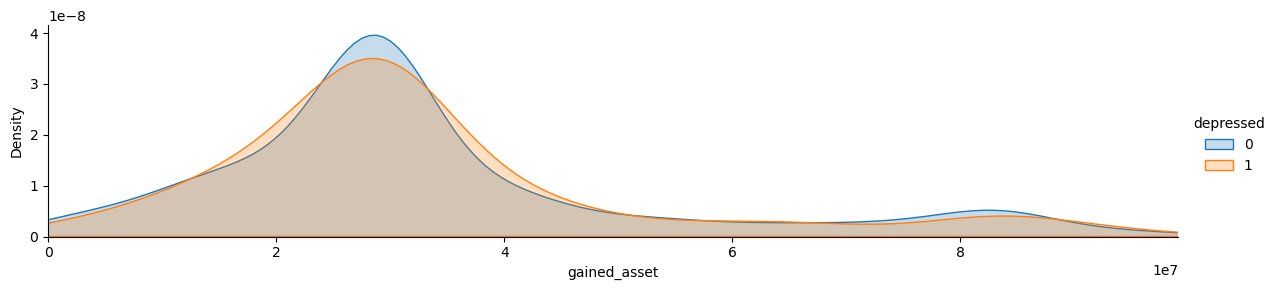

In [23]:
facet = sns.FacetGrid(dataset,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'gained_asset', shade=True)
facet.set(xlim=(0,dataset['gained_asset'].max()))
facet.add_legend()
plt.show()

стекнатите средства се речиси просечно распределени и не се ефективни

#### Durable Asset VS depressed

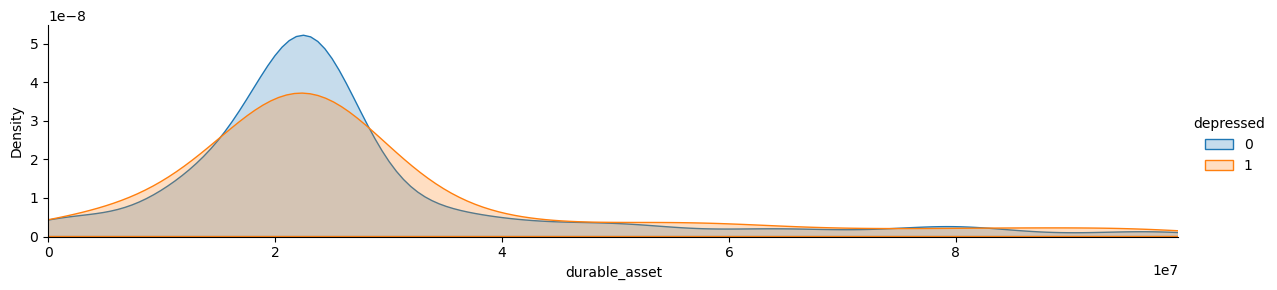

In [24]:
facet = sns.FacetGrid(dataset,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'durable_asset', shade=True)
facet.set(xlim=(0,dataset['durable_asset'].max()))
facet.add_legend()
plt.show()

сепак луѓето кои имаат од 2 до 3 трајни средства се склони да бидат депресивни

#### Farm Expenses VS depressed

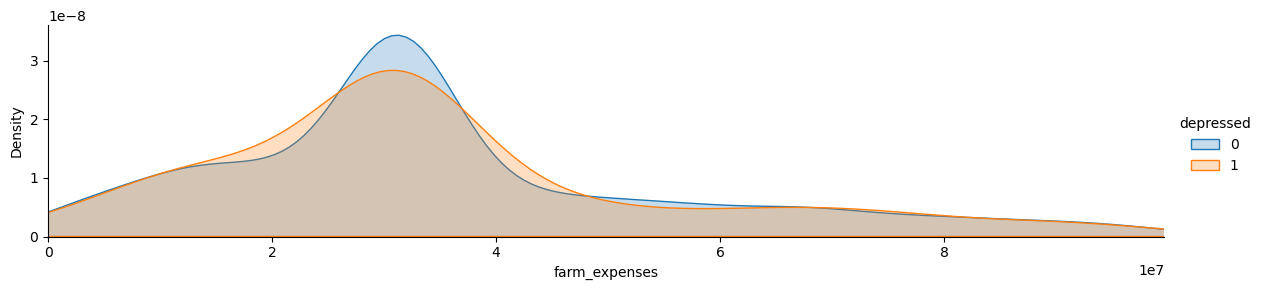

In [25]:
facet = sns.FacetGrid(dataset,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'farm_expenses', shade=True)
facet.set(xlim=(0,dataset['farm_expenses'].max()))
facet.add_legend()
plt.show()

од 2 - 5 до 3 - 5 не се депресивни

#### Lasting investment VS depressed

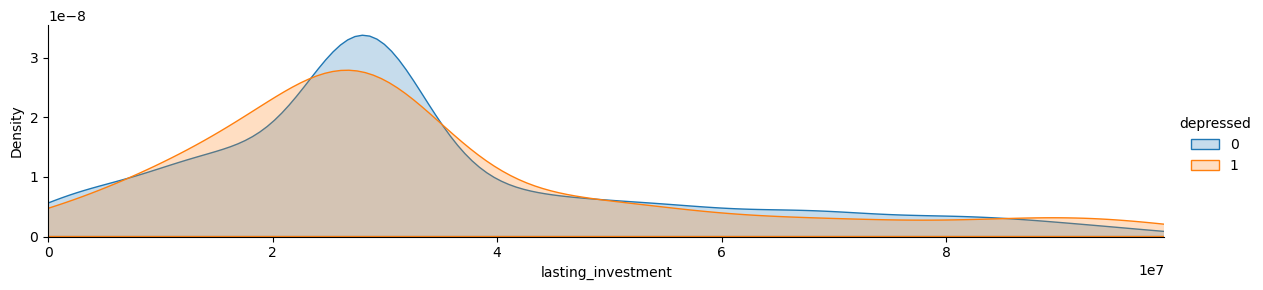

In [26]:
facet = sns.FacetGrid(dataset,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'lasting_investment', shade=True)
facet.set(xlim=(0,dataset['lasting_investment'].max()))
facet.add_legend()
plt.show()

од 2 - 5 до 3 - 5 не се депресивни

#### Корелациски матрици помеѓу карактеристиките

In [27]:
dataCorr = dataset.drop(['no_lasting_investmen'], axis=1)

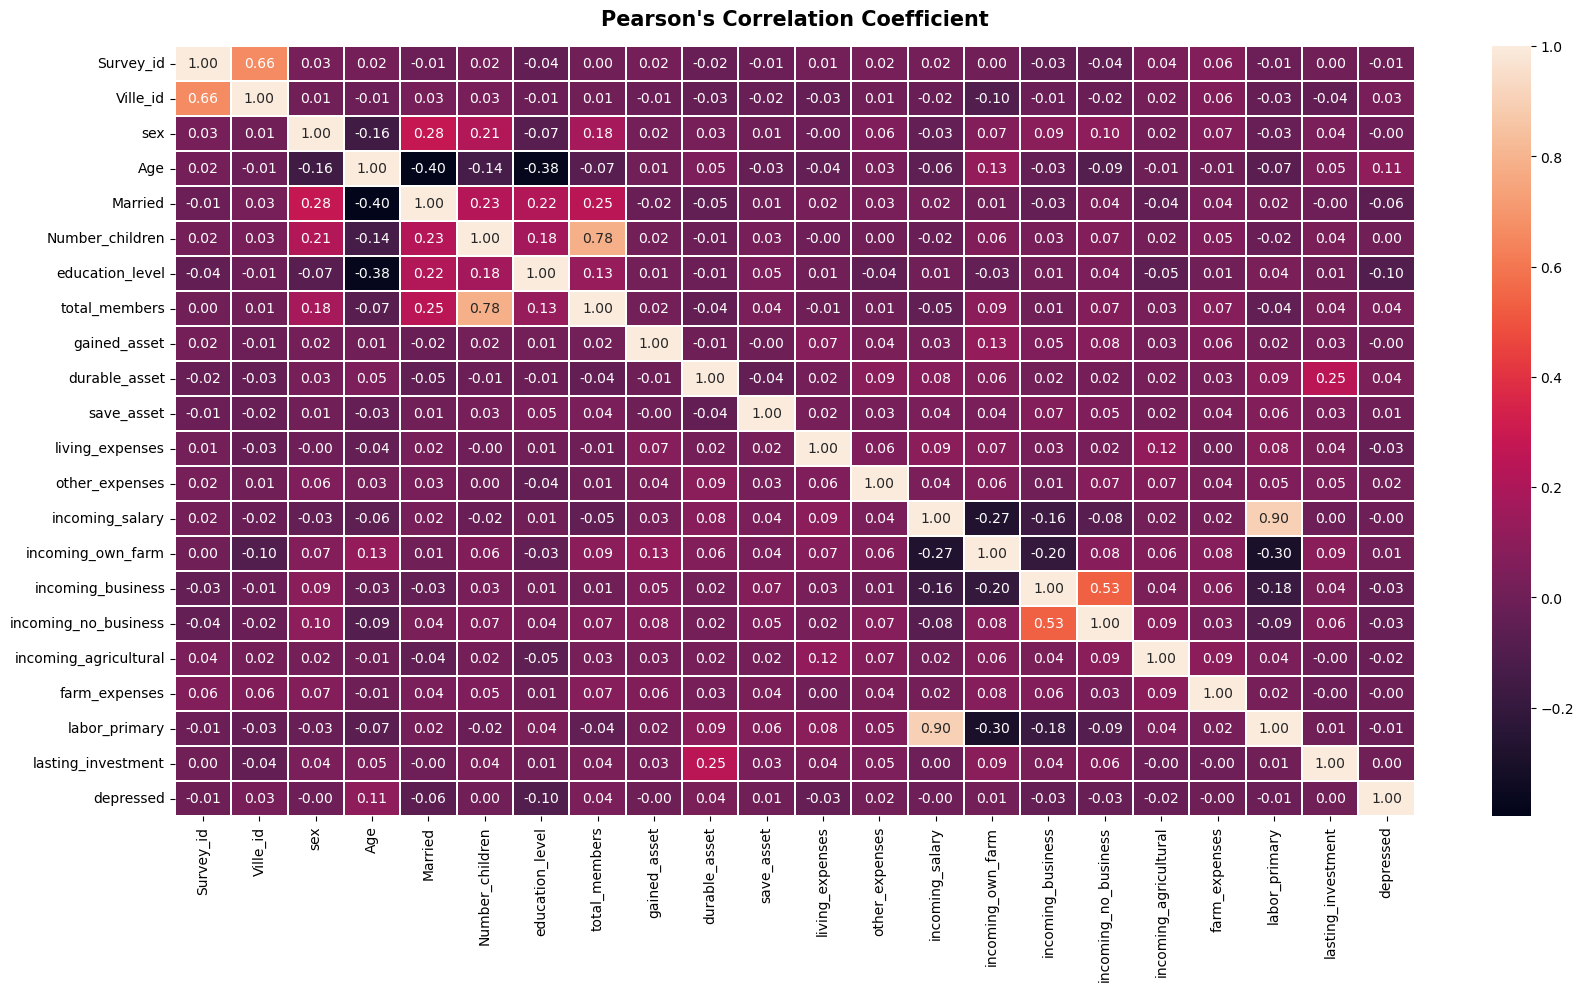

In [28]:
plt.subplots(figsize=(20,10)) 
sns.heatmap(dataCorr.corr(), annot = True, fmt = ".2f", linewidth = .10)
plt.title('Pearson\'s Correlation Coefficient', fontsize=15, fontweight='bold', pad='15.0')
plt.show()

Забележано е дека депресијата најмногу се корелира со возраста со 0,11 (позитивна корелација), и -0,1 со образование (негативна корелација).

Постои низа корелација помеѓу бројот на семејството и бројот на деца, ова е многу логично.

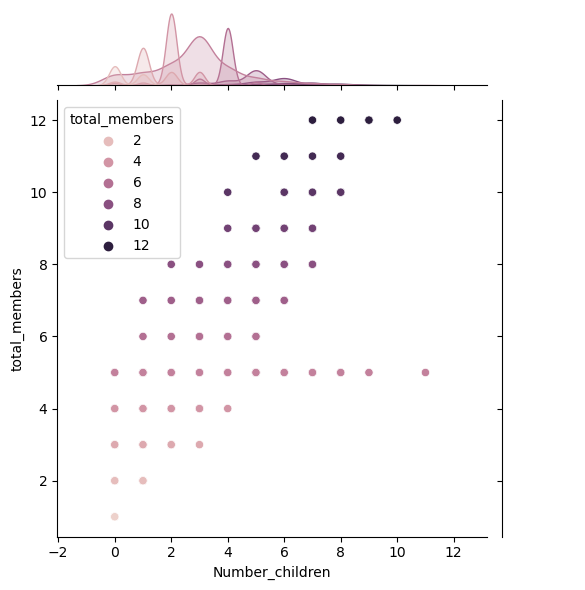

In [29]:
sns.jointplot(data = dataset, x=dataset['Number_children'], y=dataset['total_members'], hue="total_members")
plt.show()

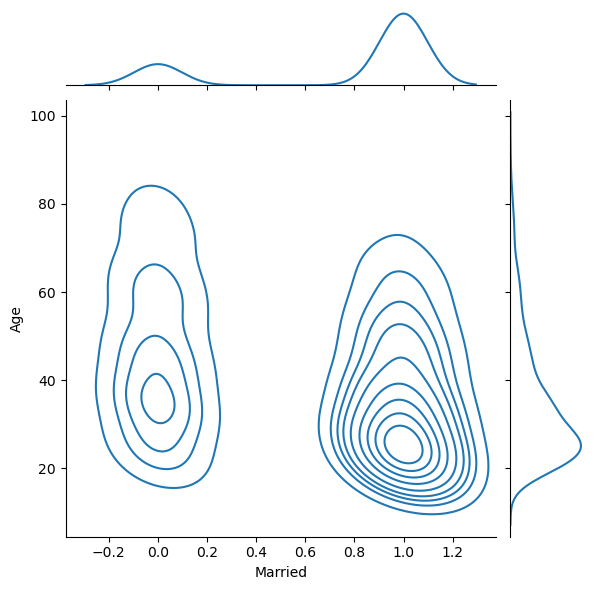

In [30]:
sns.jointplot(x="Married", y="Age", data=dataset, kind='kde')

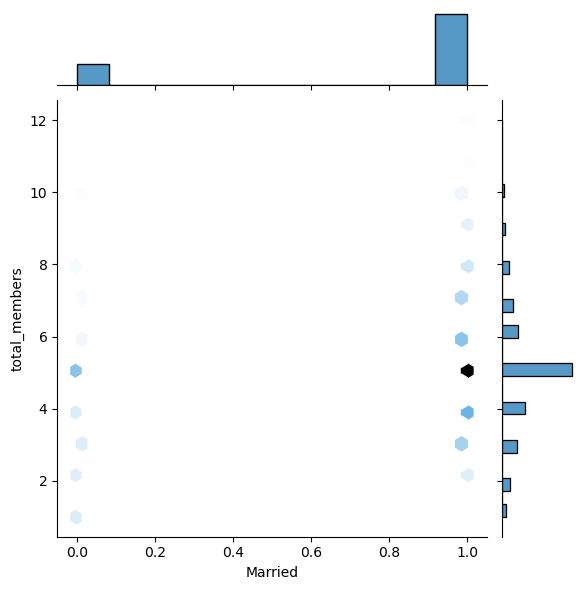

In [31]:
sns.jointplot(data = dataset, x=dataset['Married'], y=dataset['total_members'], kind='hex')
plt.show()

Text(0.5, 1.0, 'Age v.s. education_level')

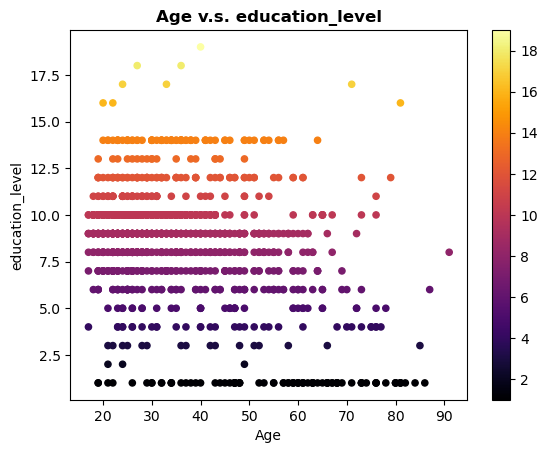

In [32]:
dataset.plot.scatter(x="Age", y="education_level", c=dataset['education_level'], colormap='inferno')
plt.title("Age v.s. education_level", weight='bold')

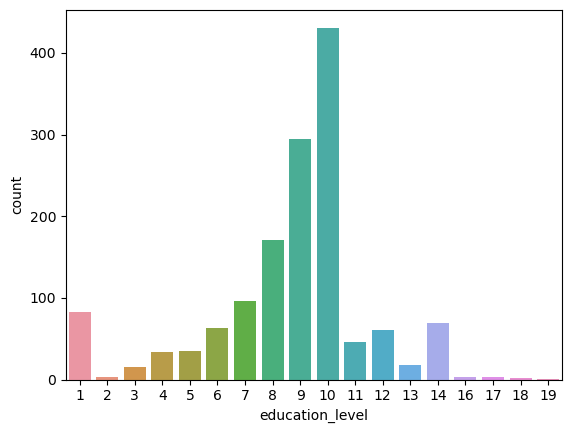

In [33]:
sns.countplot(dataset['education_level']);

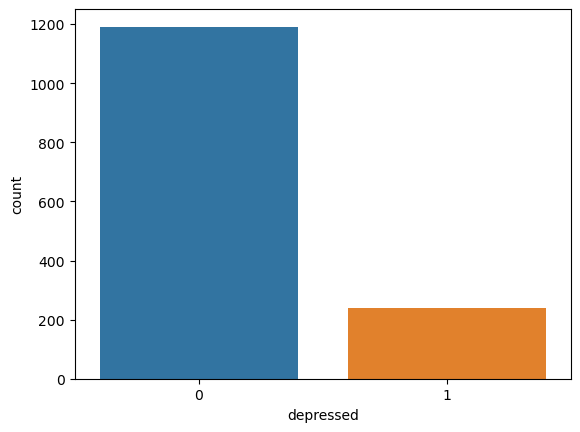

In [34]:
sns.countplot(dataset['depressed']);

<AxesSubplot:xlabel='education_level', ylabel='Age'>

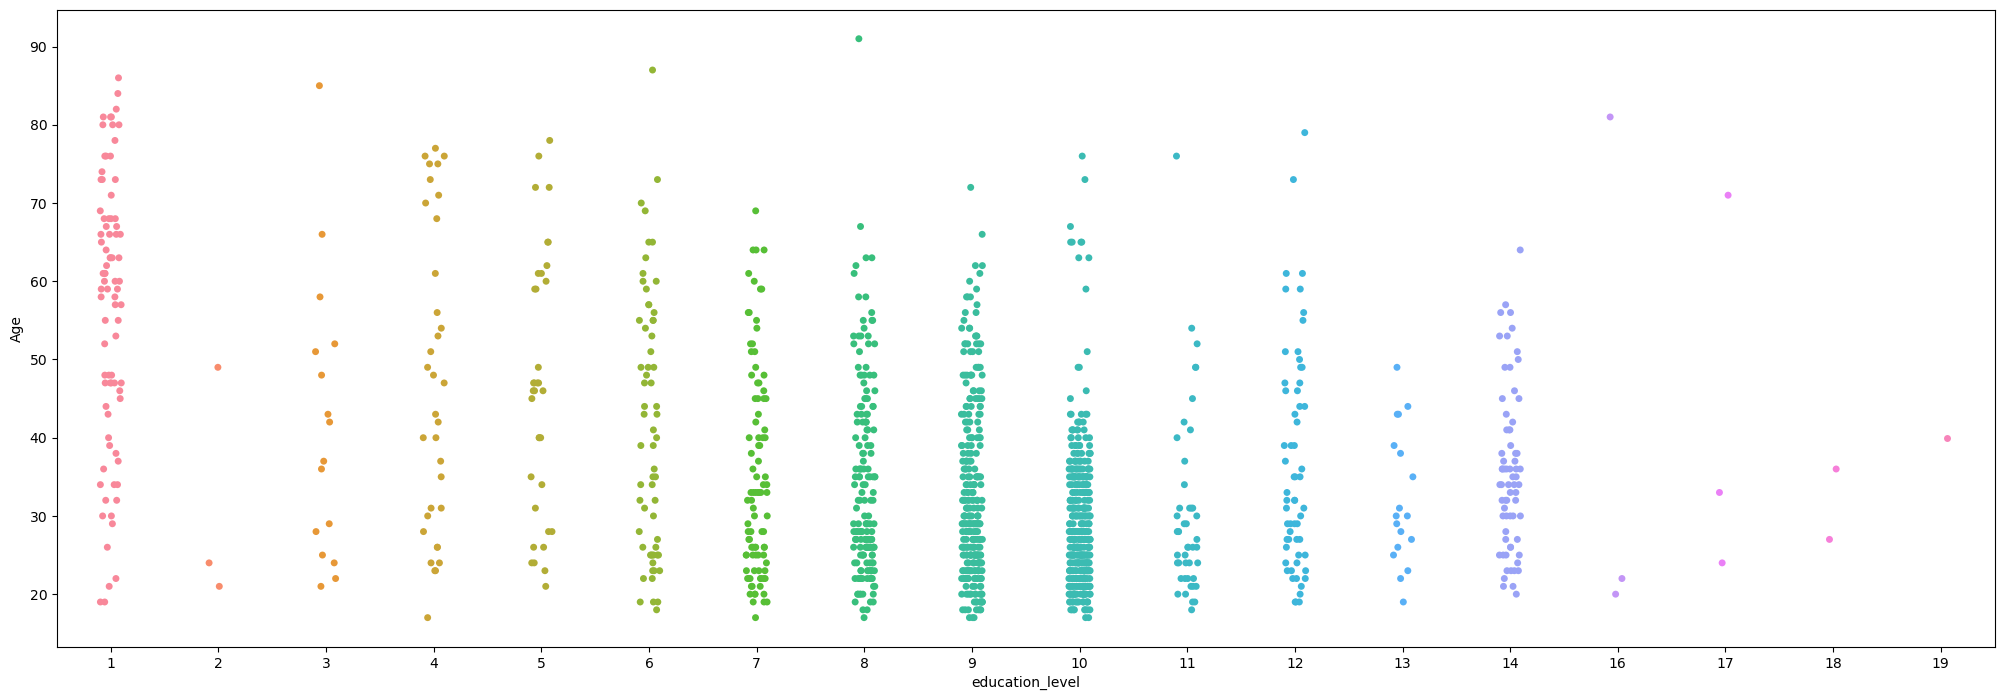

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8.27)
sns.stripplot(x = 'education_level', y ='Age', data = dataset)

&nbsp;

#### Outliers

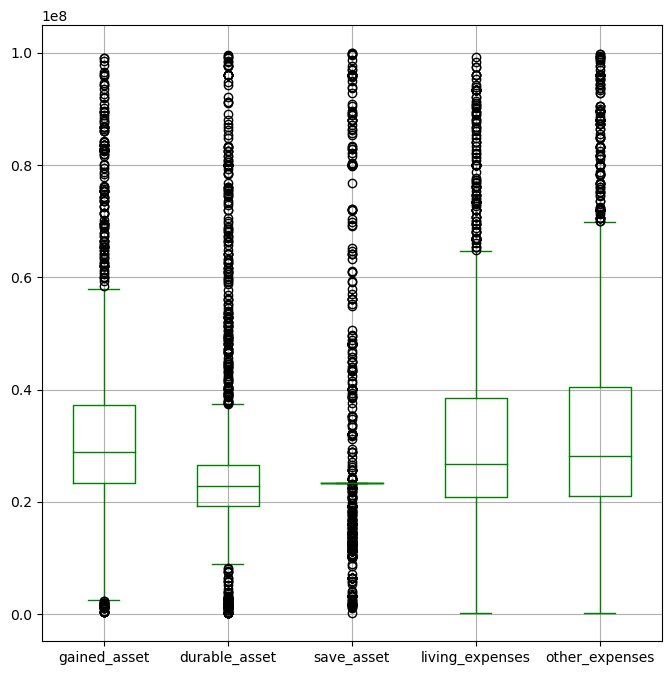

In [36]:
plt.figure(figsize=(8,8))
dataset[['gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses']].boxplot(color='green')
plt.show()

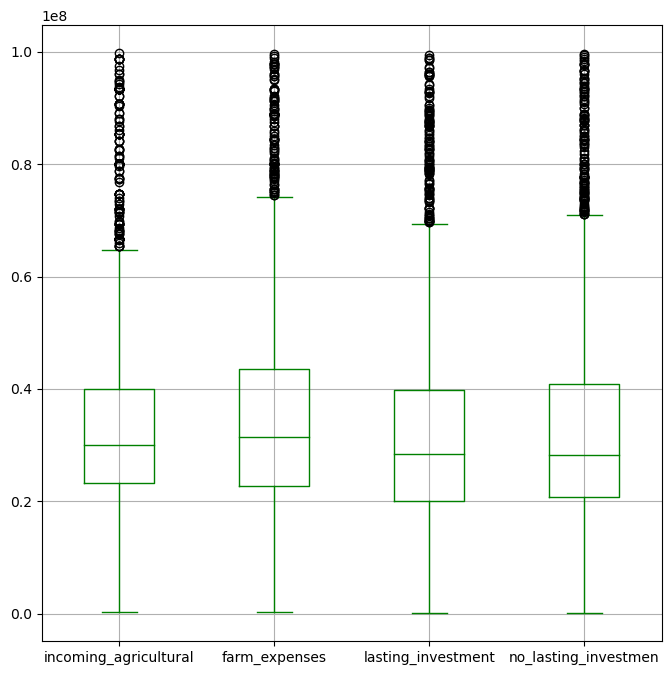

In [37]:
plt.figure(figsize=(8,8))
dataset[['incoming_agricultural' , 'farm_expenses' , 'lasting_investment' , 'no_lasting_investmen']].boxplot(color='green')
plt.show()

In [38]:
dataset.describe()[['gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses', 
                        'incoming_agricultural' , 'farm_expenses' , 'lasting_investment' , 'no_lasting_investmen']]

,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen
count,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03
mean,3.363448e+07,2.717296e+07,2.742471e+07,3.248257e+07,3.366632e+07,3.451039e+07,3.549153e+07,3.299222e+07,3.352952e+07
std,2.003854e+07,1.815672e+07,1.775137e+07,2.101528e+07,2.170266e+07,2.077846e+07,2.112372e+07,2.121621e+07,2.145955e+07
min,3.251120e+05,1.625560e+05,1.729660e+05,2.629190e+05,1.729660e+05,3.251120e+05,2.715050e+05,7.429200e+04,1.263120e+05
25%,2.326982e+07,1.929852e+07,2.339998e+07,2.088671e+07,2.098014e+07,2.322229e+07,2.279966e+07,2.001911e+07,2.074791e+07
50%,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,2.820307e+07,3.002882e+07,3.136343e+07,2.841172e+07,2.829271e+07
75%,3.717283e+07,2.656950e+07,2.339998e+07,3.843689e+07,4.051889e+07,4.003842e+07,4.348584e+07,3.982686e+07,4.088368e+07
max,9.912755e+07,9.961560e+07,9.992676e+07,9.929528e+07,9.982380e+07,9.978910e+07,9.965119e+07,9.944667e+07,9.965119e+07


In [39]:
data_outliers = dataset[['gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses', 
                        'incoming_agricultural' , 'farm_expenses' , 'lasting_investment' , 'no_lasting_investmen']]

In [40]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [41]:
for i in data_outliers:
    outliers = find_outliers_IQR(data_outliers[i])
    print(data_outliers[i])
    print('\nnumber of outliers: '+ str(len(outliers)))
    print('\nmax outlier value: '+ str(outliers.max()))
    print('\nmin outlier value: '+ str(outliers.min()))
    print('-------------------------------------------')

0       28912201
1       28912201
2       28912201
3       52667108
4       82606287
          ...   
1424    28912201
1425    15711078
1426    42440731
1427    28912201
1428    81678391
Name: gained_asset, Length: 1429, dtype: int64

number of outliers: 209

max outlier value: 99127548

min outlier value: 325112
-------------------------------------------
0       22861940
1       22861940
2       22861940
3       19698904
4       17352654
          ...   
1424    22861940
1425    24023054
1426    22861940
1427    22861940
1428    22861940
Name: durable_asset, Length: 1429, dtype: int64

number of outliers: 295

max outlier value: 99615601

min outlier value: 162556
-------------------------------------------
0       23399979
1       23399979
2       23399979
3       49647648
4       23399979
          ...   
1424    23399979
1425    15506558
1426    22562605
1427    23399979
1428    47855984
Name: save_asset, Length: 1429, dtype: int64

number of outliers: 466

max outlier value: 9992

In [42]:
def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper, df.mean(), np.where(df < lower, df.mean(), df))
    return df

In [43]:
dataset[['gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses', 'incoming_agricultural' , 'farm_expenses' , 
          'lasting_investment' , 'no_lasting_investmen']] = impute_outliers_IQR(dataset[['gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses', 'incoming_agricultural' , 'farm_expenses' , 
          'lasting_investment' , 'no_lasting_investmen']])

In [44]:
dataset.describe()[['gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses', 'incoming_agricultural' , 'farm_expenses' , 
          'lasting_investment' , 'no_lasting_investmen']]

,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen
count,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03
mean,2.865454e+07,2.298114e+07,2.471245e+07,2.704717e+07,2.879253e+07,2.928900e+07,3.172222e+07,2.861962e+07,2.908909e+07
std,9.533702e+06,5.146018e+06,1.887394e+06,1.219055e+07,1.377380e+07,1.235928e+07,1.543020e+07,1.435411e+07,1.456388e+07
min,2.466367e+06,8.979818e+06,2.339998e+07,2.629190e+05,1.729660e+05,3.251120e+05,2.715050e+05,7.429200e+04,1.263120e+05
25%,2.478189e+07,2.234144e+07,2.339998e+07,2.088671e+07,2.098014e+07,2.322229e+07,2.279966e+07,2.001911e+07,2.074791e+07
50%,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,2.820307e+07,3.002882e+07,3.136343e+07,2.841172e+07,2.829271e+07
75%,3.363448e+07,2.717296e+07,2.742471e+07,3.248257e+07,3.366632e+07,3.451039e+07,3.549153e+07,3.299222e+07,3.352952e+07
max,5.782440e+07,3.737987e+07,2.742471e+07,6.459532e+07,6.982701e+07,6.472878e+07,7.411558e+07,6.943444e+07,7.104262e+07


&nbsp;

## Скалирање

In [45]:
scaler = MinMaxScaler()

In [46]:
dataset_copy = dataset.copy()

In [47]:
columns = dataset_copy.columns
columns

Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [48]:
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset_copy[dataset_copy.columns.drop(['Survey_id', 'Ville_id', 'sex', 'Married', 'save_asset', 
                                                                                           'incoming_salary','incoming_own_farm', 'incoming_business', 
                                                                                           'incoming_no_business', 'labor_primary', 'depressed'])]), 
                           columns=columns.drop(['Survey_id', 'Ville_id', 'sex', 'Married', 'save_asset', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business', 'labor_primary', 'depressed']))

In [49]:
dataset_scaled.head()

,Age,Number_children,education_level,total_members,gained_asset,durable_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen
0,0.148649,0.363636,0.500000,0.363636,0.477723,0.488806,0.410825,0.402419,0.461211,0.421048,0.408555,0.397178
1,0.081081,0.272727,0.388889,0.363636,0.477723,0.488806,0.410825,0.402419,0.461211,0.421048,0.408555,0.397178
2,0.067568,0.272727,0.444444,0.363636,0.477723,0.488806,0.410825,0.402419,0.461211,0.421048,0.408555,0.397178
3,0.135135,0.181818,0.500000,0.272727,0.906837,0.377432,0.002095,0.629817,0.341020,0.250255,0.111113,0.974296
4,0.567568,0.363636,0.500000,0.454545,0.563028,0.294818,0.500831,0.480853,0.823858,0.277064,0.288729,0.610482


&nbsp;

## Намалување на димензионалноста

In [50]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(dataset_scaled)

In [51]:
pca_features

array([[ 0.1023843 , -0.07553061],
       [ 0.04200896, -0.05814156],
       [ 0.0620922 , -0.07407657],
       ...,
       [-0.62278948,  0.4728707 ],
       [-0.11637147,  0.06051736],
       [-0.02102535, -0.16750513]])

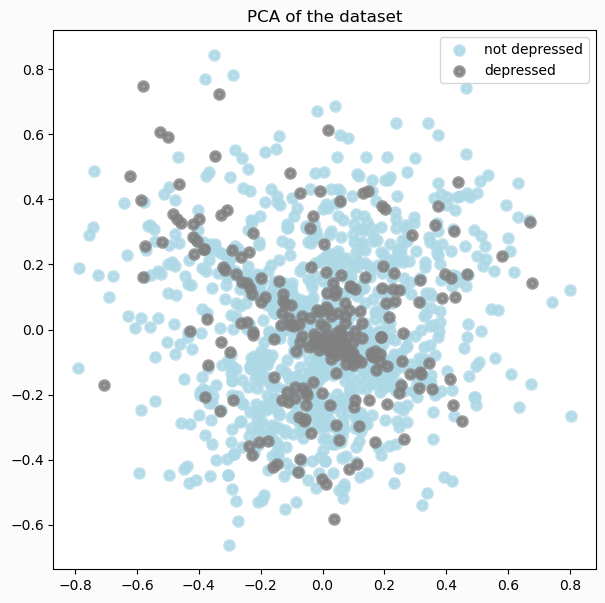

In [52]:
colors = ['lightblue', 'gray']
fig = plt.figure(figsize=(7, 7), facecolor="#fbfbfb")

for i, color in enumerate(zip(colors)):
    plt.scatter(pca_features[dataset['depressed'] == i, 0], pca_features[dataset['depressed'] == i, 1], color=color, alpha=.8, lw=3,
               label='depressed' if i == 1 else 'not depressed')
plt.legend(loc='best', shadow=False)
plt.title('PCA of the dataset')
plt.show()